In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
ticker = "IAG.L"
stock = yf.Ticker(ticker.upper())
history = stock.history(period='max')

In [3]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"5,539.00","5,539.00","5,539.00","5,539.00","5,539.00","5,539.00","5,539.00"
mean,256.79,260.87,252.57,256.68,"13,684,756.31",0.02,0.00
std,138.69,140.06,137.33,138.67,"12,519,680.45",0.67,0.00
min,67.69,71.11,5.49,65.41,0.00,0.00,0.00
25%,153.01,155.97,150.51,152.79,"6,507,973.00",0.00,0.00
50%,203.44,206.71,199.56,203.25,"9,767,536.00",0.00,0.00
75%,348.23,353.65,342.66,347.95,"16,455,108.50",0.00,0.00
max,659.20,672.98,646.61,660.19,"186,030,046.00",35.00,0.00


In [4]:
stock.info

{'address1': 'Waterside (HAA2)',
 'address2': 'PO Box 365',
 'city': 'Harmondsworth',
 'zip': 'UB7 0GB',
 'country': 'United Kingdom',
 'website': 'https://www.iairgroup.com',
 'industry': 'Airlines',
 'industryKey': 'airlines',
 'industryDisp': 'Airlines',
 'sector': 'Industrials',
 'sectorKey': 'industrials',
 'sectorDisp': 'Industrials',
 'longBusinessSummary': 'International Consolidated Airlines Group S.A., together with its subsidiaries, engages in the provision of passenger and cargo transportation services in the United Kingdom, Spain, the United States, and rest of the world. It also provides aircraft leasing, aircraft maintenance, tour operation, air freight operations, call centre, ground handling, trustee, retail, IT, finance, procurement, storage and custody, aircraft technical assistance, human resources support, and airport infrastructure development services; and manages airline loyalty programmes. The company operates under the British Airways, Iberia, Vueling, Aer Lin

In [5]:
stock.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,"-917,000.00","39,520,000.00","25,748,000.00","-550,000.00"
Tax Rate For Calcs,0.13,0.19,0.16,0.11
Normalized EBITDA,"6,221,000,000.00","3,293,000,000.00","-980,000,000.00","-5,072,000,000.00"
Total Unusual Items,"-7,000,000.00","208,000,000.00","157,000,000.00","-5,000,000.00"
Total Unusual Items Excluding Goodwill,"-7,000,000.00","208,000,000.00","157,000,000.00","-5,000,000.00"
Net Income From Continuing Operation Net Minority Interest,"2,655,000,000.00","431,000,000.00","-2,933,000,000.00","-6,935,000,000.00"
Reconciled Depreciation,"2,063,000,000.00","2,107,000,000.00","1,916,000,000.00","2,113,000,000.00"
Reconciled Cost Of Revenue,"22,756,000,000.00","18,969,000,000.00","9,480,000,000.00","13,340,000,000.00"
EBITDA,"6,214,000,000.00","3,501,000,000.00","-823,000,000.00","-5,077,000,000.00"
EBIT,"4,151,000,000.00","1,394,000,000.00","-2,739,000,000.00","-7,190,000,000.00"


In [6]:
stock.cash_flow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,"1,320,000,000.00","979,000,000.00","-885,000,000.00","-5,371,000,000.00",NaN
Repurchase Of Capital Stock,"-77,000,000.00","-23,000,000.00","-24,000,000.00",0.00,NaN
Repayment Of Debt,"-4,268,000,000.00","-1,050,000,000.00","-784,000,000.00","-978,000,000.00",NaN
Issuance Of Debt,"1,001,000,000.00","1,436,000,000.00","4,817,000,000.00","3,567,000,000.00",NaN
Issuance Of Capital Stock,NaN,NaN,NaN,"2,674,000,000.00",0.00
Capital Expenditure,"-3,544,000,000.00","-3,875,000,000.00","-744,000,000.00","-1,939,000,000.00",NaN
End Cash Position,"5,441,000,000.00","9,196,000,000.00","7,892,000,000.00","5,774,000,000.00",NaN
Beginning Cash Position,"9,196,000,000.00","7,892,000,000.00","5,774,000,000.00","4,062,000,000.00",NaN
Effect Of Exchange Rate Changes,"-2,000,000.00","-31,000,000.00","205,000,000.00","-228,000,000.00",NaN
Changes In Cash,"-3,753,000,000.00","1,335,000,000.00","1,913,000,000.00","1,940,000,000.00",NaN


In [7]:
stock.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,"55,844,755.00","17,052,745.00","10,153,335.00","5,096,863.00",NaN
Ordinary Shares Number,"4,915,631,255.00","4,954,423,265.00","4,961,322,675.00","4,966,379,147.00",NaN
Share Issued,"4,971,476,010.00","4,971,476,010.00","4,971,476,010.00","4,971,476,010.00",NaN
Net Debt,"1,674,000,000.00","1,169,000,000.00","2,081,000,000.00",NaN,NaN
Total Debt,"16,082,000,000.00","19,984,000,000.00","19,610,000,000.00","15,679,000,000.00",NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,"6,806,000,000.00","9,566,000,000.00","7,908,000,000.00","5,879,000,000.00",NaN
Other Short Term Investments,"1,365,000,000.00","370,000,000.00","16,000,000.00","105,000,000.00",NaN
Cash And Cash Equivalents,"5,441,000,000.00","9,196,000,000.00","7,892,000,000.00","5,774,000,000.00",NaN
Cash Equivalents,"3,910,000,000.00","5,910,000,000.00","5,323,000,000.00","3,892,000,000.00",NaN


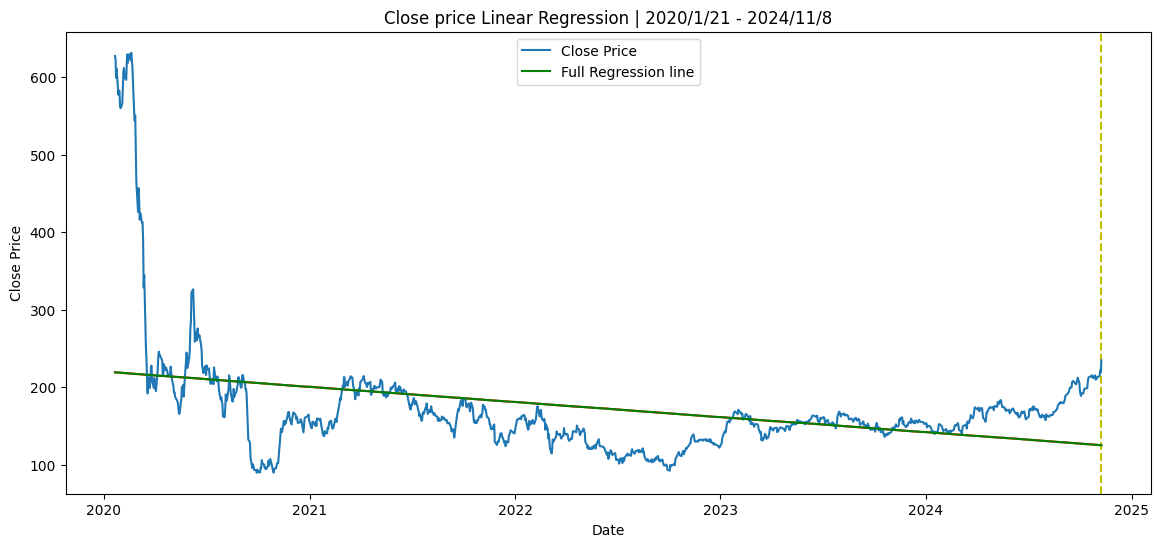

Coefficient (slope): -0.07813805057421871


In [22]:
a = plotting.plot_regression_line(history["2004":], reg_line_count=0, log_scale=False)

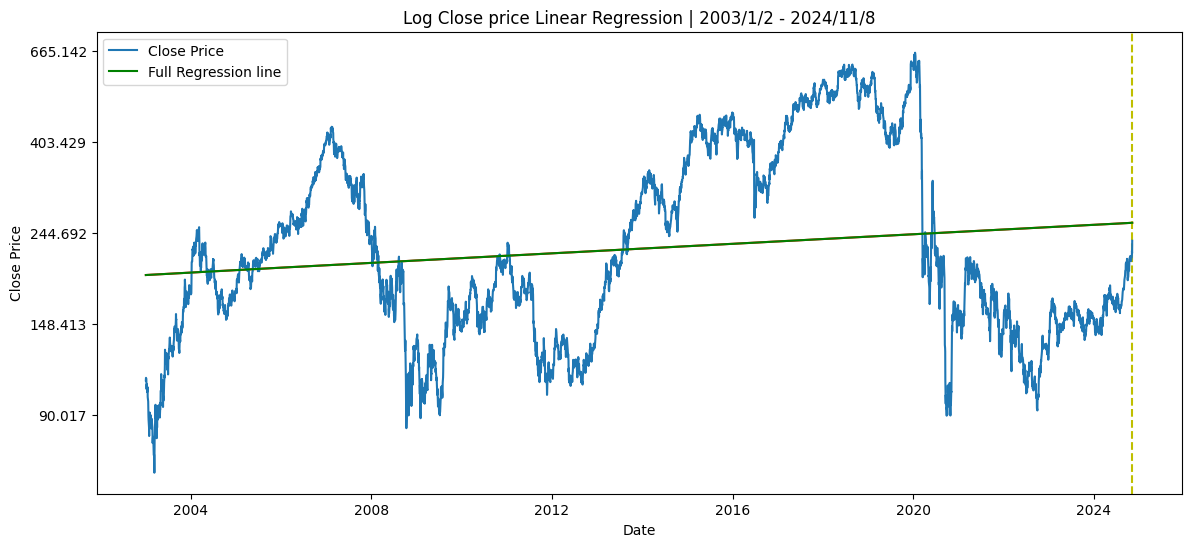

Coefficient (slope): 5.193015815548656e-05


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [9]:
plotting.plot_regression_line(history["1998":], reg_line_count=1, log_scale=True)

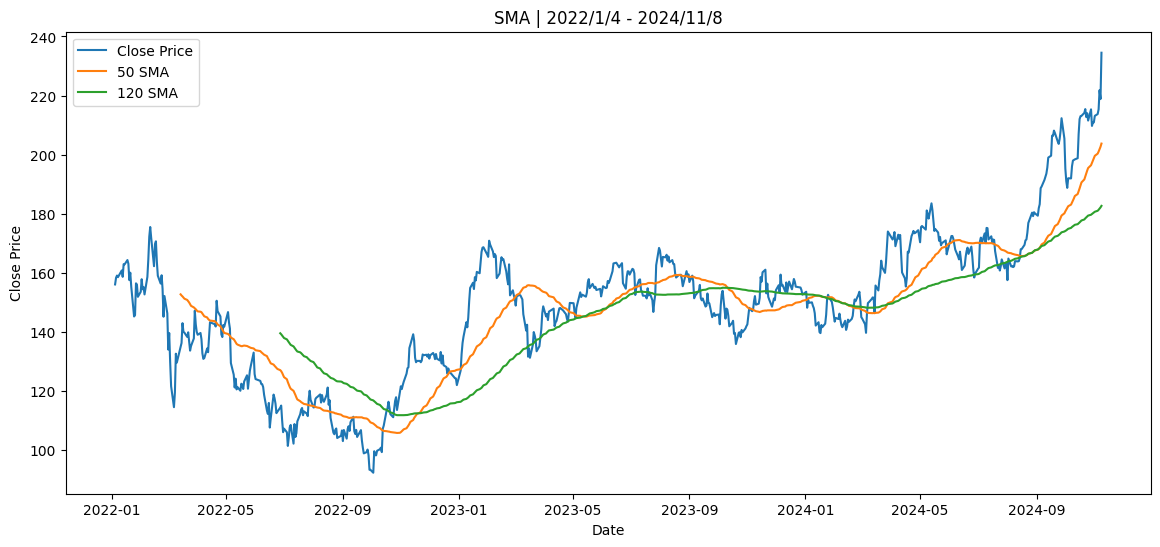

<BarContainer object of 1219 artists>

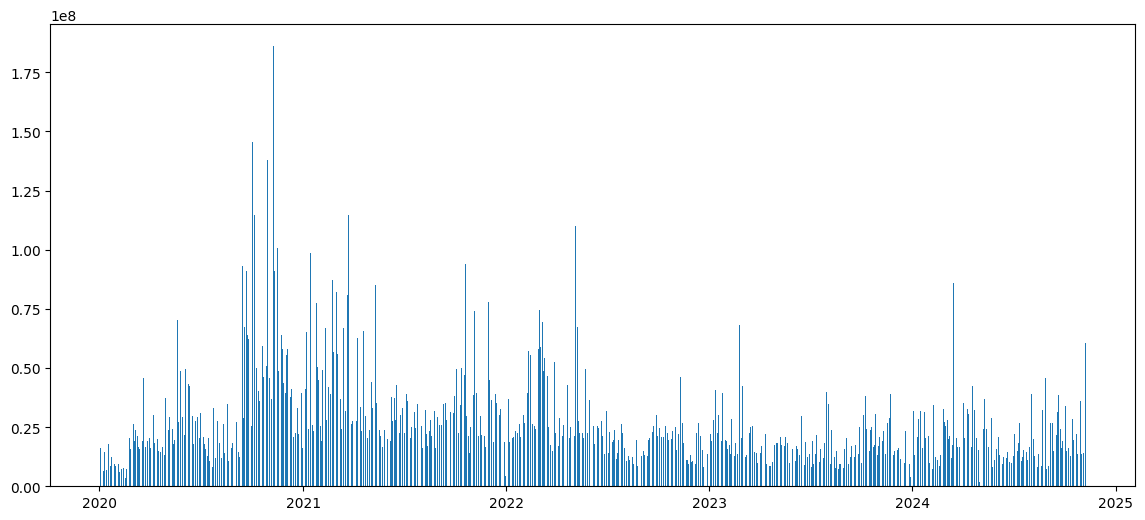

In [25]:
plotting.plot_sma(history["2022":], [50, 120], hide_data=False)
plt.figure(figsize=(14, 6))
plt.bar(history.index, history["Volume"])

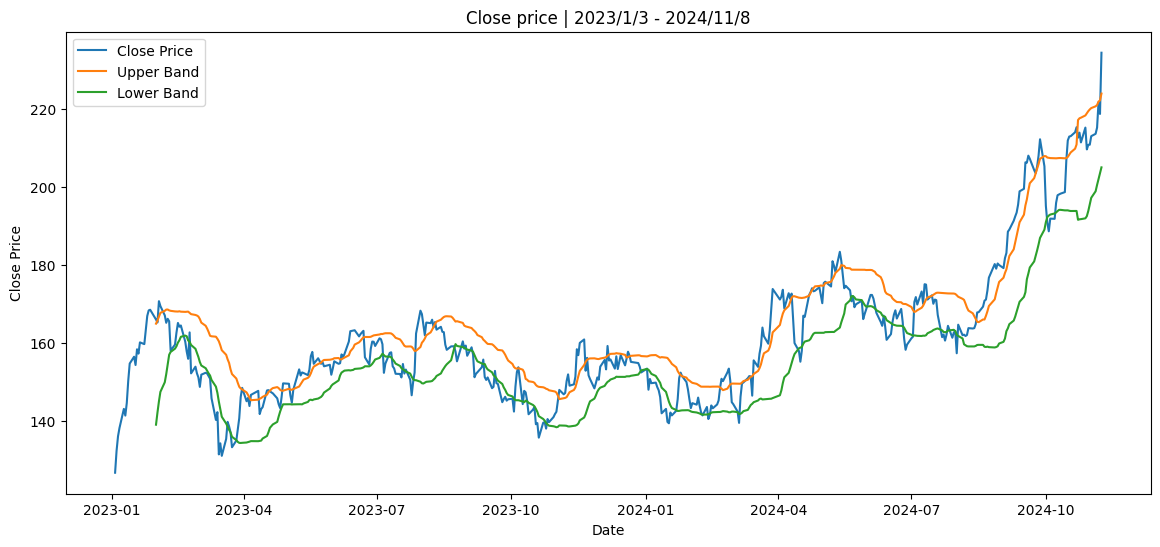

In [11]:
plotting.plot_bolinger_bands(history["2023":], 20, 1)

In [12]:
import ta
import pandas as pd
from ta.utils import dropna

history = history["2020":]
indicator = ta.momentum.RSIIndicator(history["Close"])

history["Indicator"] = indicator.rsi()

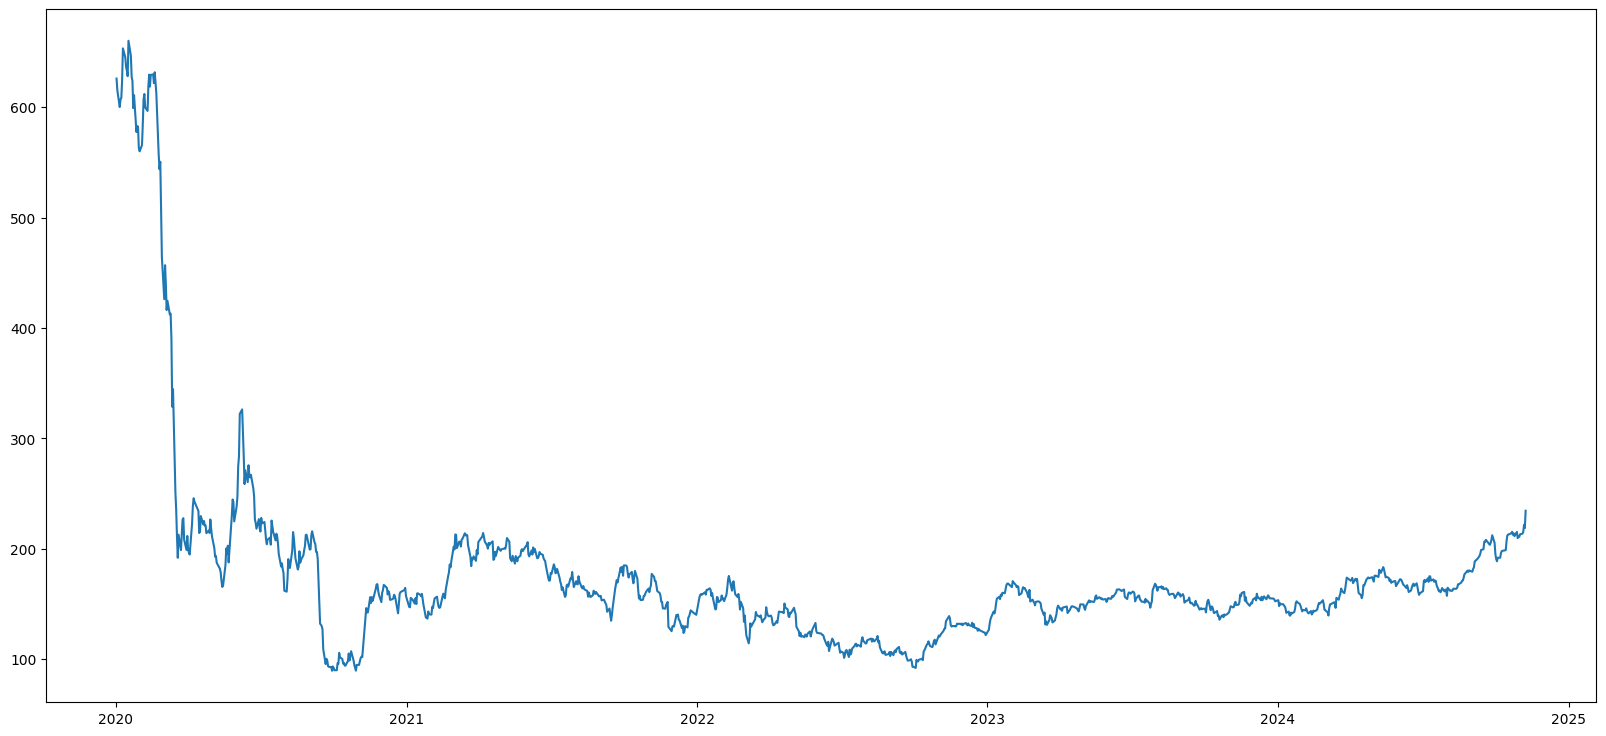

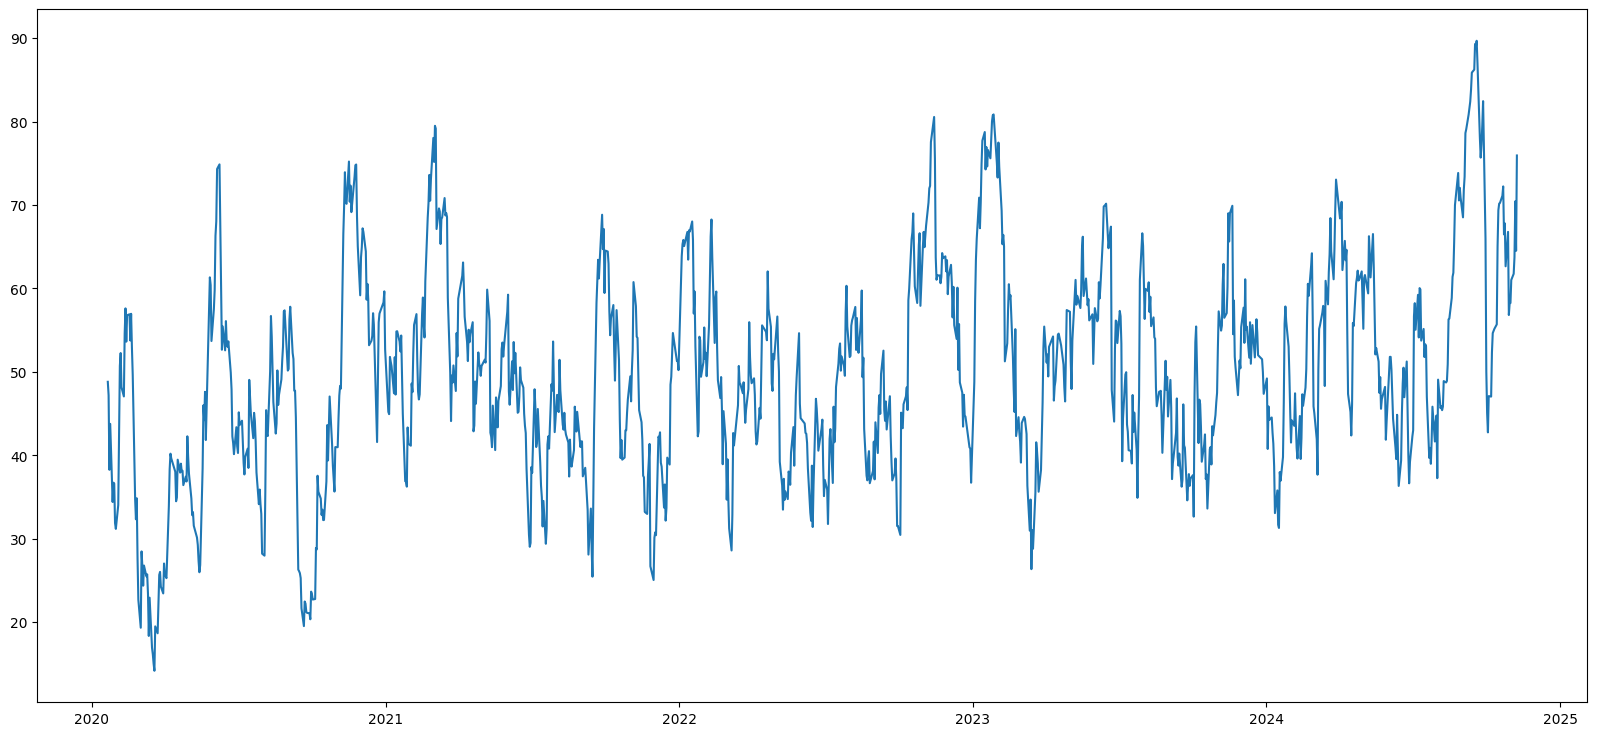

In [13]:
plt.figure(figsize=(20, 9))
plt.plot(history['Close'])
plt.figure(figsize=(20, 9))
plt.plot(history['Indicator'])